In [ ]:
!apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"
import findspark
findspark.init()

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd '/content/gdrive/MyDrive/LDS9_K265_TranHoangBach/Week_2/data_day_3'

Mounted at /content/gdrive
/content/gdrive/MyDrive/LDS9_K265_TranHoangBach/Week_2/data_day_3


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import Row, SQLContext, SparkSession
sc = SparkContext(master="local", appName="New Spark Context")
spark = SparkSession(sc)
sqlcontext = SQLContext(sc)

In [17]:
file_name = 'Fifa2018_dataset.csv'
fifa_df = spark.read.csv(file_name, inferSchema = True, header = True)
fifa_df.show(2)

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+--------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|          Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking

In [18]:
fifa_df.count()

17981

In [19]:
fifa_df.createOrReplaceTempView('fifa_table')

In [20]:
query = 'SELECT Age FROM fifa_table WHERE Nationality == "Germany"'
fifa_germany_age = spark.sql(query)
fifa_germany_age.show(3)

+---+
|Age|
+---+
| 31|
| 27|
| 28|
+---+
only showing top 3 rows



In [21]:
fifa_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293756|
|    min|               16|
|    max|               36|
+-------+-----------------+



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


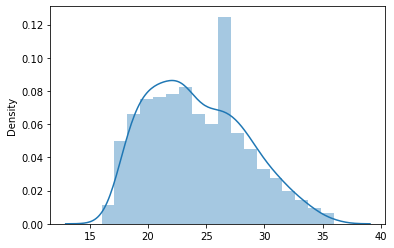

In [22]:
temp = fifa_germany_age.toPandas()
sb.distplot(temp);

- Phân phối tuổi của các cầu thủ Germany chưa phải là phân phối chuẩn.
- Phân phối bị lệch phải.
- Ít có outlier

In [36]:
fifa_df.groupBy('Age').agg({'Name': 'count'}).sort(fifa_df['Age'].asc()).show()

+---+-----------+
|Age|count(Name)|
+---+-----------+
| 16|         13|
| 17|        258|
| 18|        672|
| 19|       1069|
| 20|       1245|
| 21|       1286|
| 22|       1324|
| 23|       1394|
| 24|       1334|
| 25|       1522|
| 26|       1202|
| 27|       1152|
| 28|       1051|
| 29|       1121|
| 30|        804|
| 31|        671|
| 32|        506|
| 33|        617|
| 34|        272|
| 35|        191|
+---+-----------+
only showing top 20 rows



In [37]:
fifa_df.groupby('Nationality').agg({'Age': 'mean'}).show()

+--------------+------------------+
|   Nationality|          avg(Age)|
+--------------+------------------+
|          Chad|              25.0|
|        Russia| 25.23202614379085|
|      Paraguay| 26.10144927536232|
|       Senegal|25.046511627906977|
|        Sweden|25.119565217391305|
|        Guyana|              28.0|
|       Eritrea|              32.0|
|   Philippines|25.666666666666668|
|          Fiji|              29.0|
|        Turkey|25.127147766323024|
|          Iraq|              26.0|
|       Germany| 24.20263157894737|
|St Kitts Nevis|26.666666666666668|
|       Comoros| 27.11111111111111|
|   Afghanistan|              22.0|
|   Ivory Coast| 24.10891089108911|
|         Sudan|              22.5|
|        France|24.634969325153374|
|        Greece|24.418367346938776|
|        Kosovo|           23.9375|
+--------------+------------------+
only showing top 20 rows



In [51]:
fifa_df.select('Age').toPandas().min()

Age    16
dtype: int32

In [52]:
fifa_df.select('Age').toPandas().max()

Age    47
dtype: int32

In [49]:
fifa_df.select('Strength').toPandas().min()

Strength    12.0
dtype: float64

In [50]:
fifa_df.select('Strength').toPandas().max()

Strength    98.0
dtype: float64

In [53]:
query = 'SELECT DISTINCT Club FROM fifa_table'
spark.sql(query).show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|     Cheltenham Town|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
+--------------------+
only showing top 20 rows



In [56]:
fifa_df.select('Club').distinct().show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|     Cheltenham Town|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
+--------------------+
only showing top 20 rows



In [58]:
fifa_df_desc = fifa_df.sort(fifa_df.Age.desc())
fifa_df_desc.show(5)

+-----+-------------+---+--------------------+-----------+--------------------+-------+---------+-----------------+--------------------+-----+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|  _c0|         Name|Age|               Photo|Nationality|                Flag|Overall|Potential|             Club|           Club Logo|Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|G

In [59]:
query = 'SELECT * FROM fifa_table WHERE Name like "%Cristiano%" '
spark.sql(query).show()

+----+-----------------+---+--------------------+-----------+--------------------+-------+---------+---------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
| _c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|           Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kic

In [61]:
fifa_df.where(fifa_df.Name.contains('Cristiano')).show()

+----+-----------------+---+--------------------+-----------+--------------------+-------+---------+---------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
| _c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|           Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kic